CIFAR10 dataset trained on all classes with 'normal' CNN without augmentation.

### Loading images
https://www.tensorflow.org/tutorials/load_data/images

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt

# Jupyter-specific
%matplotlib inline

In [41]:
import sys
sys.path.append('/home/henrik/master_thesis/code/utils')
from data_prep import create_dataset, print_class_info, show_image

In [55]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
%autoreload 2

Some parameters

In [60]:
data_dir = pathlib.Path('/mnt/sdb/cifar10/train/')

config = {
    "data_dir": data_dir,
    "cache_dir": "/home/henrik/master_thesis/code/testing/cache",
    "MODEL": 'cnn',
    "DS_INFO": 'complete',
    "neg_class": None,
    "NUM_EPOCHS": 5,
    "BATCH_SIZE": 64,
    "IMG_SIZE": (32, 32, 3),
    "outcast": None,
    "verbosity": 1
    }

model_name = '{}x{}x{}_{}_{}'.format(config["NUM_EPOCHS"], config["BATCH_SIZE"], 
                                     config["IMG_SIZE"][1], config["DS_INFO"], config["MODEL"])

Create training, testing and validation dataset from utils/data_prep.py

In [64]:
train_ds, test_ds, val_ds, params = create_complete_dataset(config)

Directories:  ['cat' 'airplane' 'deer' 'automobile' 'ship' 'horse' 'truck' 'dog' 'bird'
 'frog']

cat               : 5000
airplane          : 5000
deer              : 5000
automobile        : 5000
ship              : 5000
horse             : 5000
truck             : 5000
dog               : 5000
bird              : 5000
frog              : 5000

Total number of images: 50000, in 10 classes


## Training
### Normal CNN
See https://www.tensorflow.org/tutorials/images/cnn

In [7]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

Create the model

In [8]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=config["IMG_SIZE"]))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(params["NUM_CLASSES"], activation='softmax'))

In [9]:
if config["verbosity"] > 0:
    cnn_model.summary()

Compile and train the model

In [10]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model.compile(
                optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs/{}'.format(config["MODEL"]), update_freq='batch')]

In [16]:
history = cnn_model.fit(
        train_ds,
        steps_per_epoch = params["train_size"] // config["BATCH_SIZE"],
        epochs = config["NUM_EPOCHS"],
        validation_data = test_ds,
        validation_steps = params["test_size"] // config["BATCH_SIZE"],
        validation_freq = 1,
        callbacks = callbacks)

Train for 656 steps, validate for 140 steps
Epoch 1/5
656/656 [==============================] - 10s 15ms/step - loss: 1.5185 - accuracy: 0.4614 - val_loss: 1.2634 - val_accuracy: 0.5408
Epoch 2/5
656/656 [==============================] - 4s 6ms/step - loss: 1.1660 - accuracy: 0.5855 - val_loss: 1.7435 - val_accuracy: 0.4479
Epoch 3/5
656/656 [==============================] - 4s 5ms/step - loss: 1.0213 - accuracy: 0.6391 - val_loss: 1.2701 - val_accuracy: 0.5731
Epoch 4/5
656/656 [==============================] - 4s 6ms/step - loss: 0.9124 - accuracy: 0.6791 - val_loss: 0.9278 - val_accuracy: 0.6724
Epoch 5/5
656/656 [==============================] - 4s 5ms/step - loss: 0.8381 - accuracy: 0.7056 - val_loss: 0.8538 - val_accuracy: 0.7028


In [ ]:
# cnn_model.save('models/{}.h5'.format(model_name))
# cnn_model = tf.keras.models.load_model('models/{}.h5'.format(model_name))

## Evaluate the model

In [17]:
cnn_evaluate = cnn_model.evaluate(val_ds, verbose=2, steps=params["val_size"] // config["BATCH_SIZE"])

140/140 - 4s - loss: 0.8586 - accuracy: 0.6992


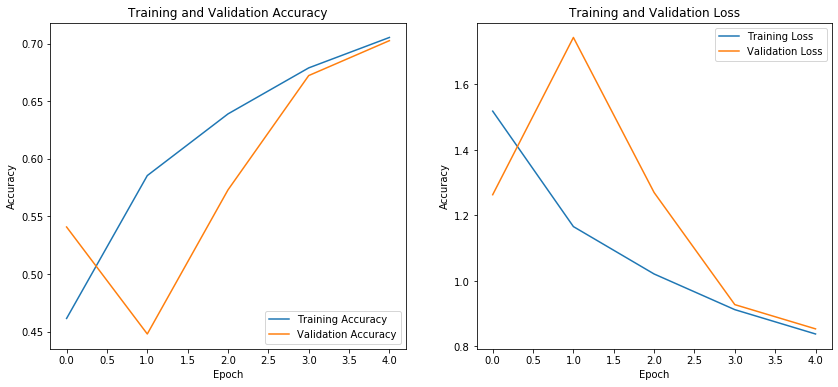

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(config["NUM_EPOCHS"])

plt.figure(figsize=(14, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.5, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
# plt.ylim([0.5, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.show()

`Tensorboard`

## Predict new samples

In [19]:
# Fetch one batch
images, labels = next(iter(val_ds))

# Convert from tensor to numpy array
images = images.numpy()
labels = labels.numpy()

0.0109 cat
0.0084 airplane
0.0004 deer
0.3038 automobile
0.1407 ship
0.0001 horse
0.5291 truck
0.0027 dog
0.0035 bird
0.0005 frog

Label: truck
Predicton: truck


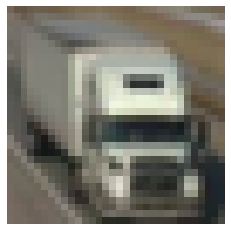

In [36]:
# Get a random image and label
rand = np.random.randint(0, config["BATCH_SIZE"])
image = images[rand]
label = labels[rand]

# Predict one image
predictions = cnn_model.predict(np.expand_dims(image, axis=0))[0]

for i, pred in enumerate(predictions):
    print("{:0.4f} {}".format(pred,params["class_names"][i]))

print ("\nLabel:", params["class_names"][label])
print ("Predicton:", params["class_names"][np.argmax(predictions)])

plt.figure(frameon=False, facecolor='white')
plt.imshow(image)
plt.axis('off');

In [37]:
# Predict one batch
predictions = cnn_model.predict(images)

print ('{:3}  {:10}  {:3}'.format('idx', 'label', 'pred'))
print ('---  -------     --------', end='')

for i, pred in enumerate(predictions):
    label = params["class_names"][labels[i]]
    prediction = params["class_names"][np.argmax(pred)]
    print ('\n{:3}  {:10}  {:10}'.format(i, label, prediction), end='')
    if (label != prediction): print ("  Wrong", end='')

idx  label       pred
---  -------     --------
  0  automobile  automobile
  1  dog         dog       
  2  deer        deer      
  3  bird        deer        Wrong
  4  dog         deer        Wrong
  5  cat         frog        Wrong
  6  cat         cat       
  7  bird        cat         Wrong
  8  bird        bird      
  9  frog        frog      
 10  ship        ship      
 11  dog         cat         Wrong
 12  airplane    airplane  
 13  automobile  automobile
 14  deer        deer      
 15  deer        deer      
 16  frog        frog      
 17  deer        deer      
 18  truck       dog         Wrong
 19  bird        cat         Wrong
 20  cat         cat       
 21  airplane    airplane  
 22  cat         dog         Wrong
 23  cat         cat       
 24  automobile  automobile
 25  cat         bird        Wrong
 26  frog        frog      
 27  frog        bird        Wrong
 28  deer        cat         Wrong
 29  automobile  automobile
 30  horse       horse     
 31  au